In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [26]:
df = pd.read_excel("C:/Users/agamb/Desktop/premium preidction/dataset/premiums_young_with_gr.xlsx")
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [27]:
df.shape

(20096, 14)

In [28]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

In [29]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [30]:
df.dropna(inplace=True)

In [31]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [32]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [33]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [34]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [35]:
df[df['number_of_dependants'] < 0]['number_of_dependants'].unique()

array([-3, -1])

In [36]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    20090.000000
mean         0.722598
std          0.937200
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

### Numeric Columns

In [37]:
numeric_cols = df.select_dtypes(['float64','int64']).columns
numeric_cols

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

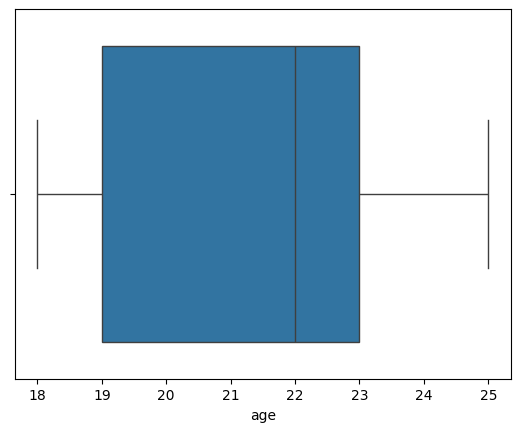

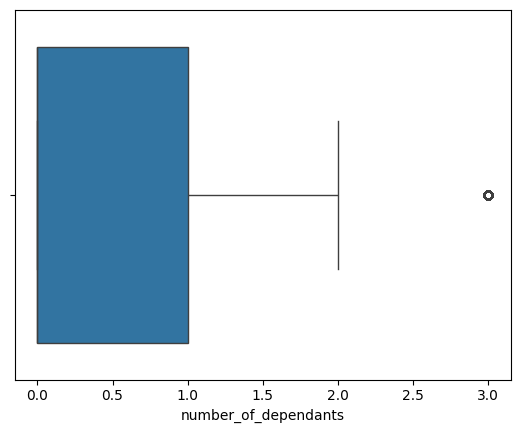

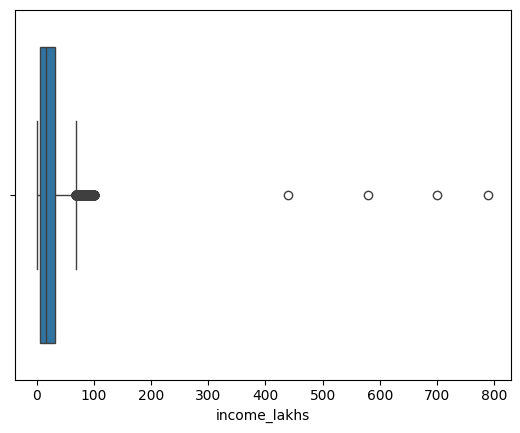

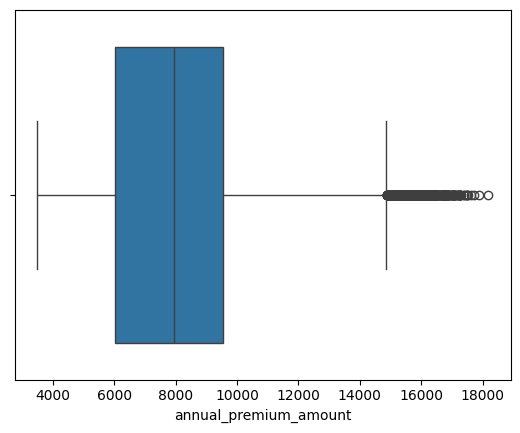

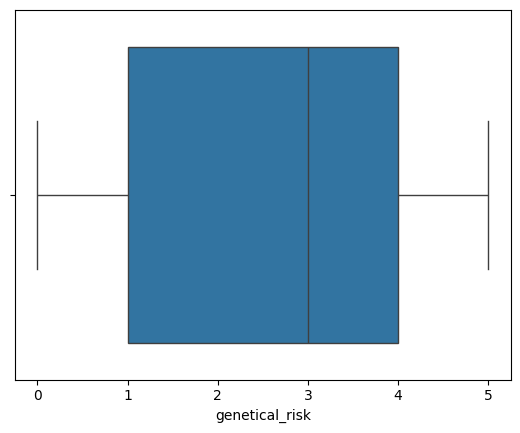

In [38]:
for col in numeric_cols:
  sns.boxplot(x=df[col])
  plt.show()

In [39]:
df[df.age>100]['age'].unique()

array([], dtype=int64)

In [40]:
df1 = df[df.age<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


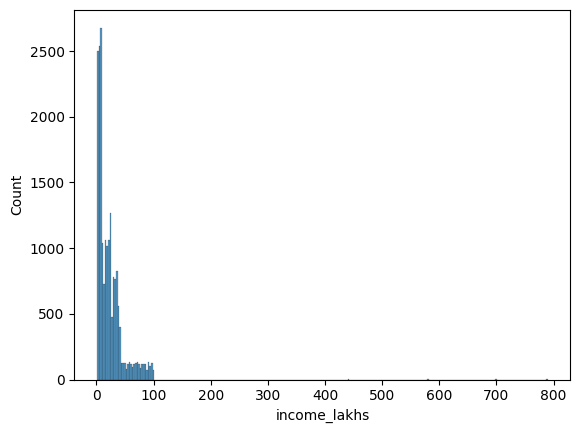

In [41]:
sns.histplot(df1.income_lakhs)
plt.show()

In [42]:
def get_iqr_bounds(col):
  Q1, Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q1 + 1.5 * IQR
  return upper_bound, lower_bound

In [43]:
get_iqr_bounds(df1.income_lakhs)

(43.5, -31.5)

In [44]:
quantile_threshold = df1.income_lakhs.quantile(0.999)
quantile_threshold

np.float64(100.0)

In [45]:
df2 = df1[df1.income_lakhs<=quantile_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,2.503883
std,2.294248,0.937238,21.732062,2749.912486,1.710184
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,100.000000,18186.000000,5.000000


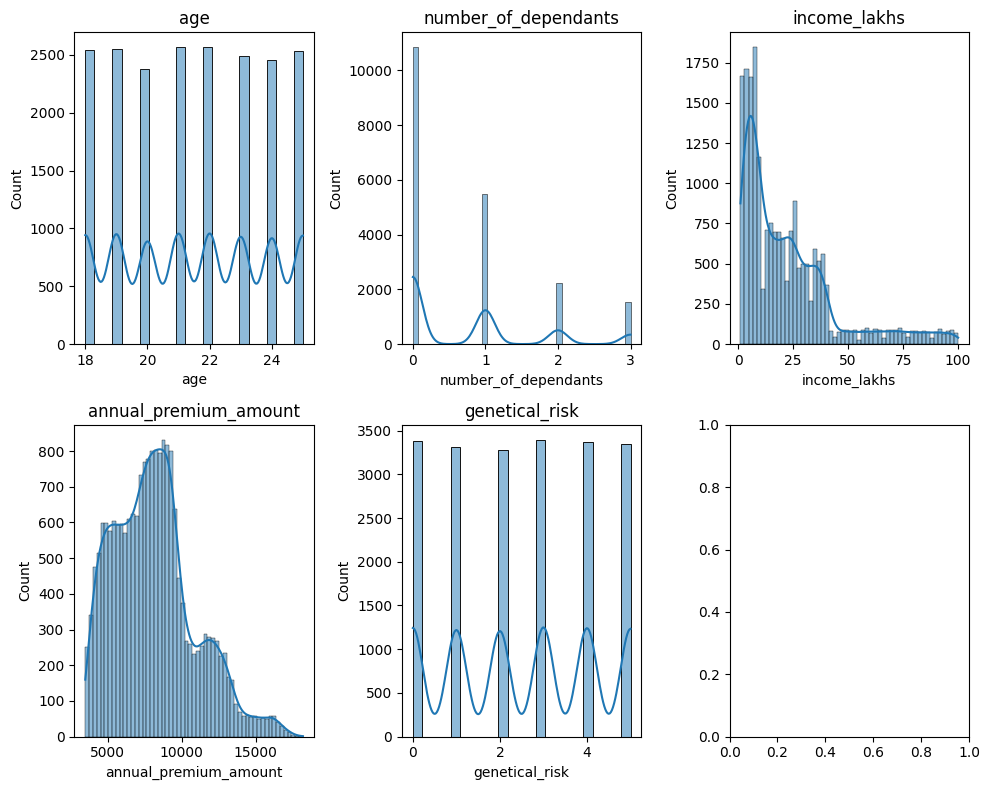

In [101]:
fig,axs = plt.subplots(nrows = 2, ncols = 3, figsize = (10,8))
for i, column in enumerate(numeric_cols):
  ax = axs[i//3, i%3]
  sns.histplot(df2[column], kde=True,ax=ax)
  ax.set_title(column)
  
plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

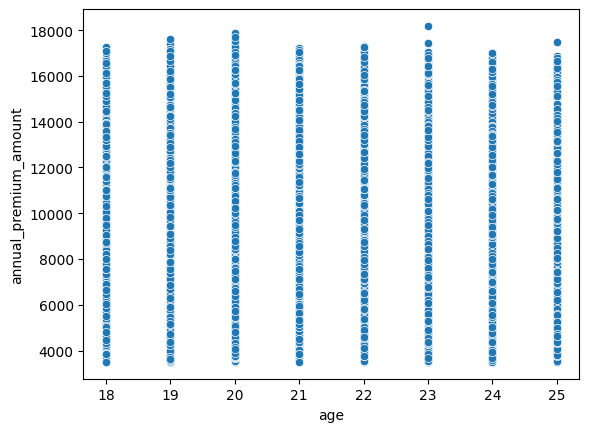

In [47]:
sns.scatterplot(df2, x='age',y='annual_premium_amount')

In [48]:
categorical_cols = df.select_dtypes(['object']).columns
categorical_cols

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

### Working on categorical columns now

In [49]:
for col in categorical_cols:
  print(col, ";", df2[col].unique())

gender ; ['Male' 'Female']
region ; ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status ; ['Unmarried' 'Married']
bmi_category ; ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status ; ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status ; ['Self-Employed' 'Freelancer' 'Salaried']
income_level ; ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history ; ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan ; ['Silver' 'Bronze' 'Gold']


In [50]:
df2['smoking_status'].replace({
  'Smoking=0': 'No Smoking',
  'Does Not Smoke': 'No Smoking',
  'Not Smoking': 'No Smoking'
},inplace=True)
df2['smoking_status'].unique()

C:\Users\agamb\AppData\Local\Temp\ipykernel_7980\3352917957.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

In [51]:
pct_count = df2['gender'].value_counts(normalize=True)
pct_count

gender
Male      0.550383
Female    0.449617
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

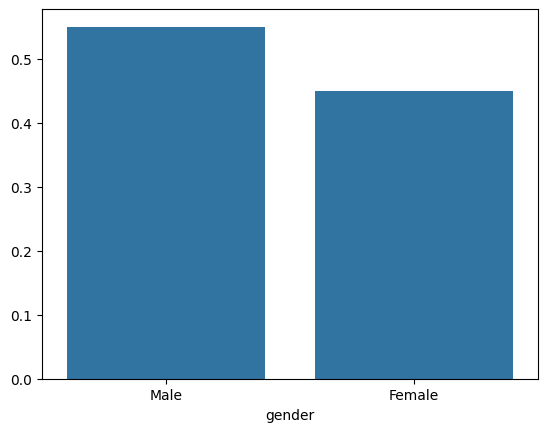

In [52]:
sns.barplot(x=pct_count.index,y=pct_count.values)

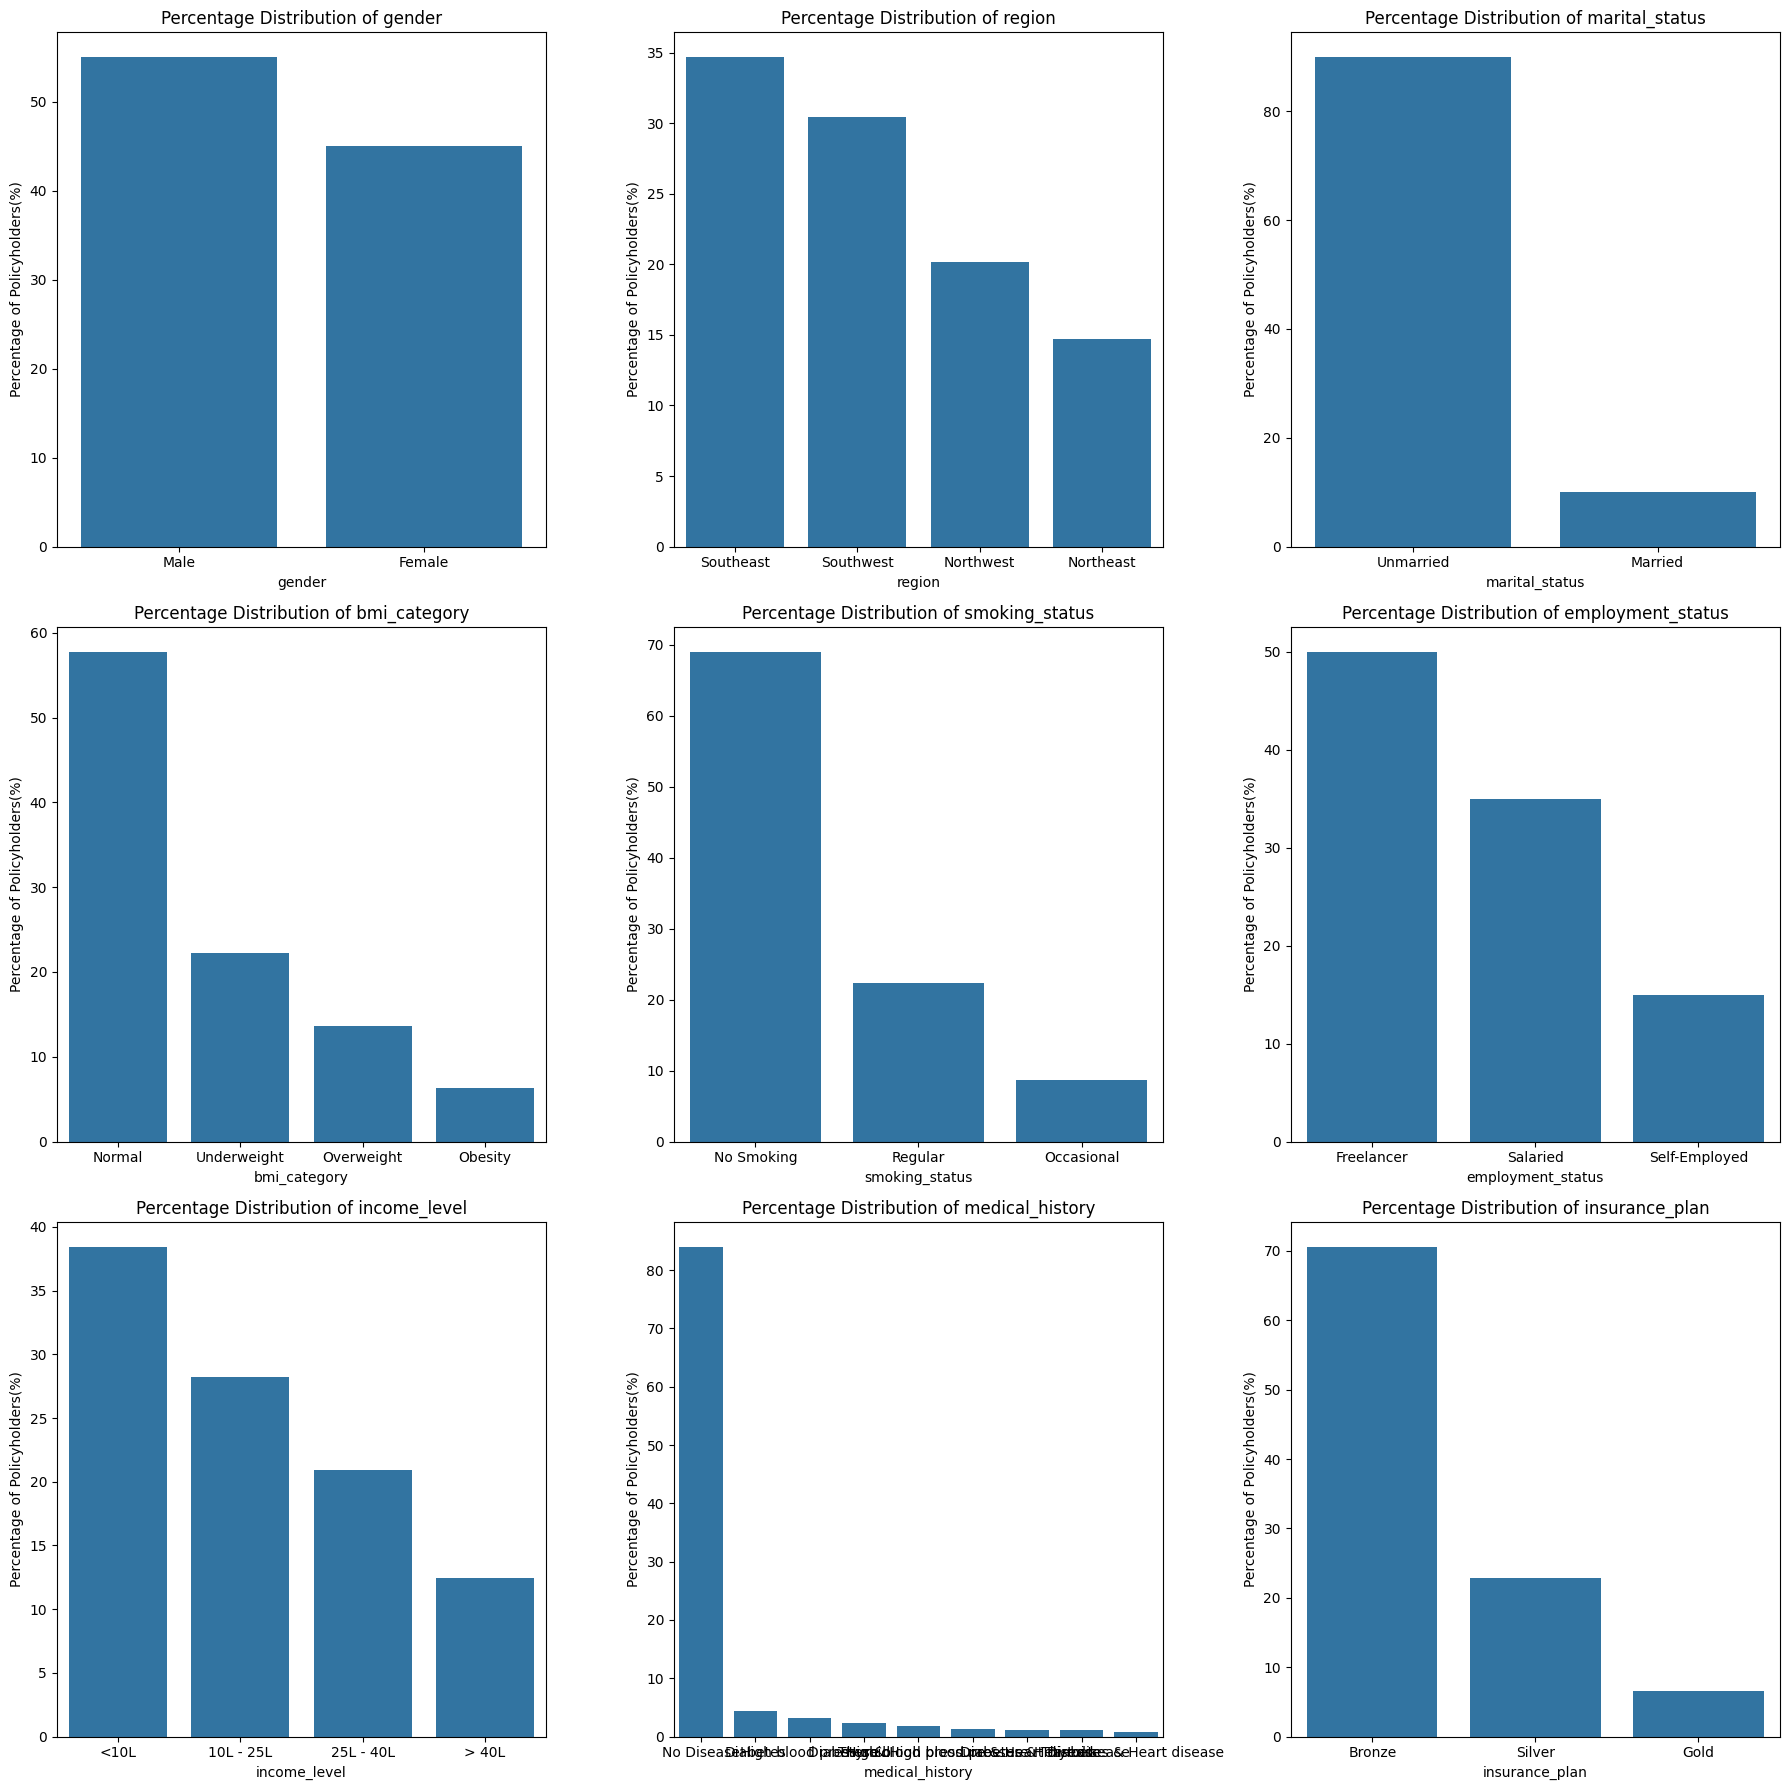

In [53]:
fig,axes = plt.subplots(3,3,figsize=(18,18))
axes = axes.flatten()
for ax , column in zip(axes, categorical_cols):
  category_counts = df2[column].value_counts(normalize=True)*100

  sns.barplot(x=category_counts.index, y=category_counts.values,ax=ax)
  ax.set_title(f'Percentage Distribution of {column}')
  ax.set_ylabel(f'Percentage of Policyholders(%)')
  ax.set_xlabel(column)

plt.tight_layout()
plt.show()

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         4508   326     828
25L - 40L         3382   209     608
<10L              6172   404    1145
> 40L              115   366    2023


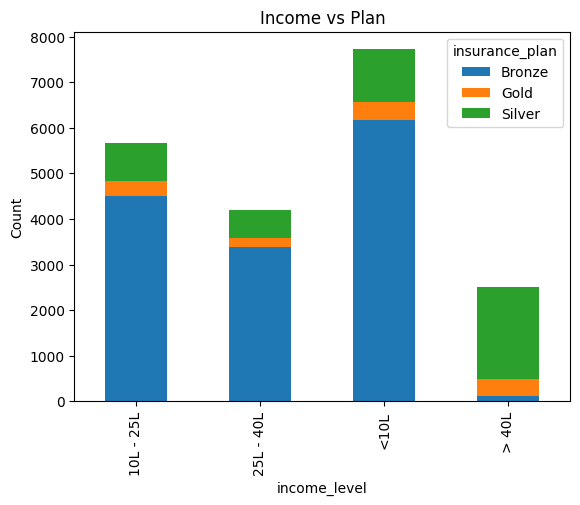

In [54]:
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
print(crosstab)

crosstab.plot(kind='bar',stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

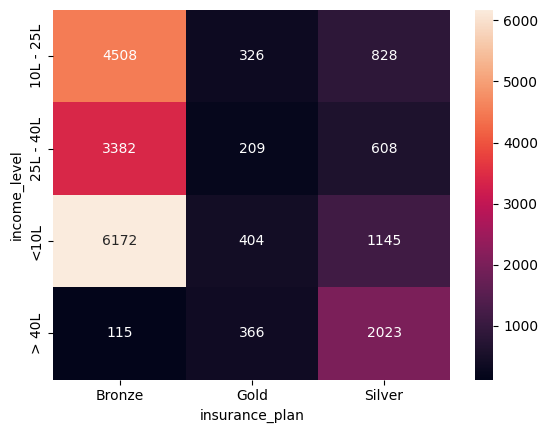

In [55]:
sns.heatmap(crosstab, annot=True,fmt='d')

### Feature engineering

In [56]:
df2.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [57]:
risk_scores = {
  'diabetes' : 6,
  'heart disease' : 8,
  'high blood pressure' : 6,
  'thyroid' : 5,
  'no disease' : 0,
  'none' : 0
}
df2[['disease1','disease2']] = df2['medical_history'].str.split(" & ",expand=True).apply(lambda x : x.str.lower())

In [58]:
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1','disease2']:
  df2['total_risk_score'] += df2[disease].map(risk_scores)

max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head()

C:\Users\agamb\AppData\Local\Temp\ipykernel_7980\4207662332.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
C:\Users\agamb\AppData\Local\Temp\ipykernel_7980\4207662332.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,no disease,none,0,0.000000


In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['income_level'] = le.fit_transform(df2['income_level'])
df2['income_level'].unique()

array([3, 2, 0, 1])

#### as label encoder works alphabetically 
#### 10L - 25L : 0 ,25L - 40L : 1 <10L : 2 , >40L : 3

In [60]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,3,99,High blood pressure,Silver,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,2,3,No Disease,Silver,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,3,97,No Disease,Silver,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,0,15,No Disease,Bronze,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,0,14,No Disease,Bronze,5712,1,no disease,none,0,0.000000


In [61]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})
df2['insurance_plan'].unique()

array([2, 1, 3])

In [62]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,3,99,High blood pressure,2,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,2,3,No Disease,2,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,3,97,No Disease,2,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,0,15,No Disease,1,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,0,14,No Disease,1,5712,1,no disease,none,0,0.000000


In [63]:
nominal_cols = ['gender','region','marital_status','bmi_category','smoking_status','employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols,drop_first=True,dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,3,99,High blood pressure,2,13365,4,high blood pressure,none,...,0,0,1,0,1,0,0,1,0,1
1,22,0,2,3,No Disease,2,11050,3,no disease,none,...,0,0,1,0,0,1,0,0,0,0
2,21,0,3,97,No Disease,2,11857,4,no disease,none,...,1,0,1,0,0,0,0,1,1,0
3,25,0,0,15,No Disease,1,5684,2,no disease,none,...,1,0,1,0,0,0,0,0,0,0
4,20,2,0,14,No Disease,1,5712,1,no disease,none,...,1,0,1,0,1,0,0,0,0,0


In [64]:
df4 = df3.drop(['medical_history','disease1','disease2','total_risk_score'],axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,3,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,2,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,3,97,2,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,0,15,1,5684,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,0,14,1,5712,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


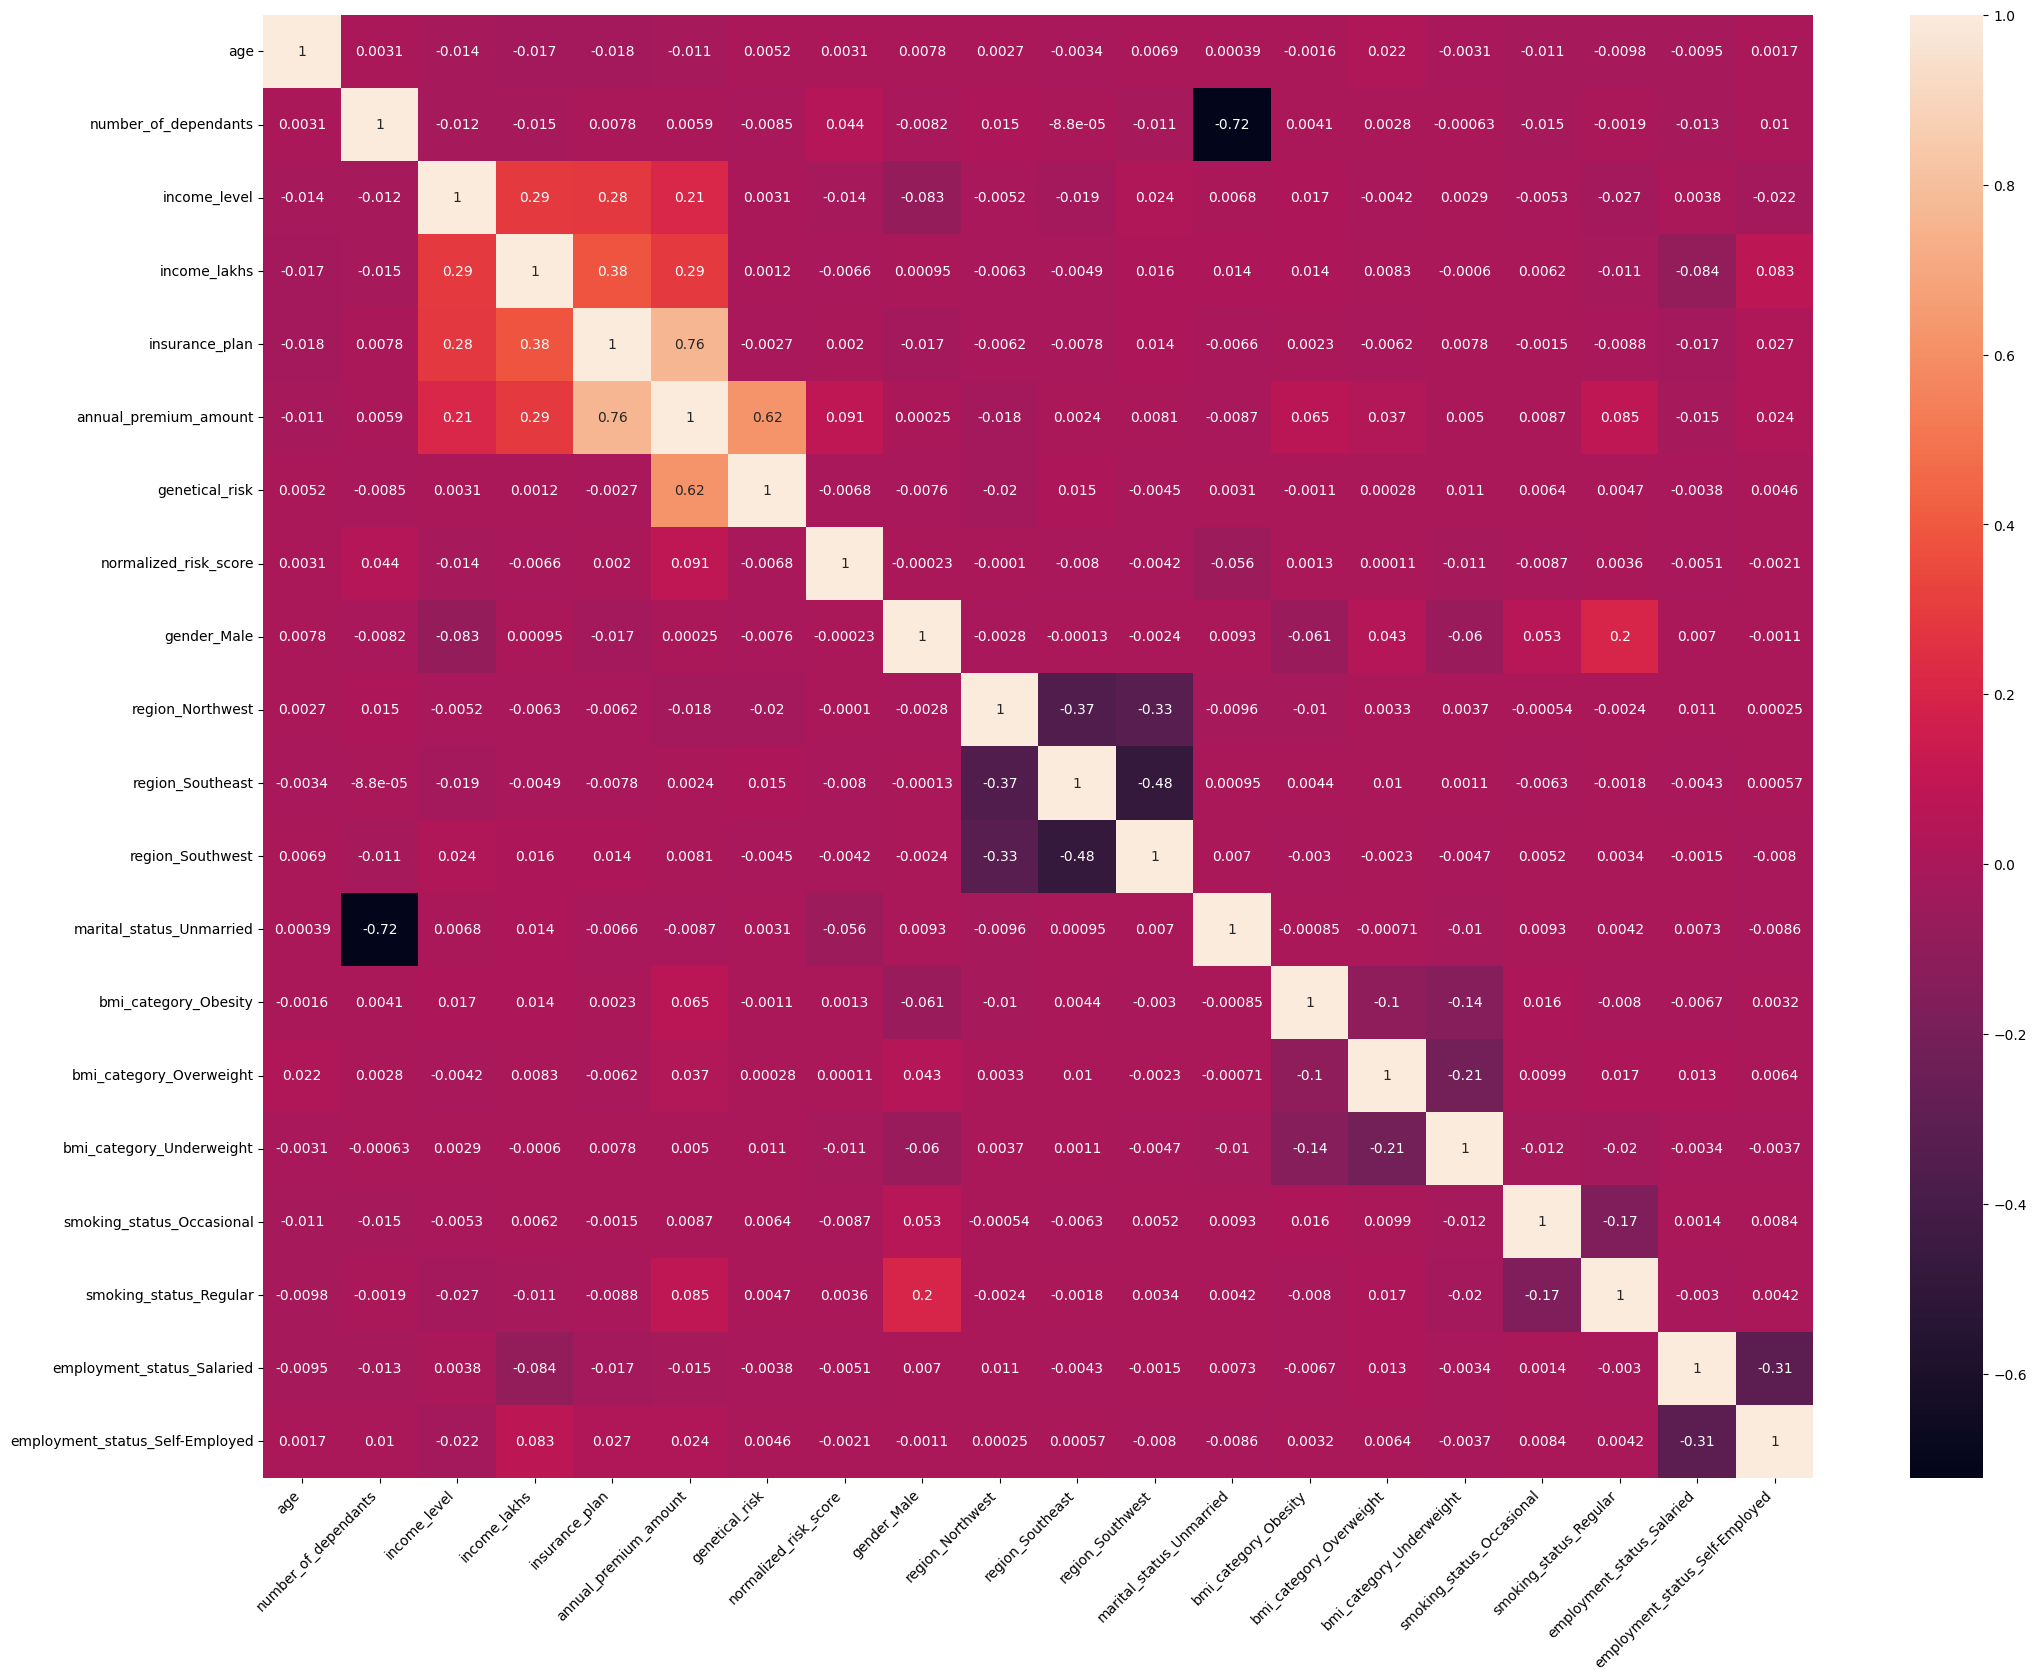

In [65]:
cm = df4.corr()
plt.figure(figsize=(25,19))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [102]:
X = df4.drop('annual_premium_amount', axis='columns')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan','genetical_risk']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.450612,0.216064,0.179578,0.500777,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.340131,0.219516,0.300051,0.342037,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.666667,0.151515,0.000000,0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,0.800000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
  vif_df = pd.DataFrame()
  vif_df['column'] = data.columns
  vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
  return vif_df

In [68]:
calculate_vif(X)

,column,VIF
0,age,3.157349
1,number_of_dependants,1.966993
2,income_level,3.053740
3,income_lakhs,2.423575
4,insurance_plan,1.650504
5,genetical_risk,2.987519
6,normalized_risk_score,1.154468
7,gender_Male,2.307672
8,region_Northwest,2.159549
9,region_Southeast,2.997631


In [69]:
calculate_vif(X.drop('income_level',axis='columns'))

,column,VIF
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,normalized_risk_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


In [70]:
X_reduced = X.drop('income_level',axis='columns')
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


### Model Training

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y,test_size=0.3,random_state=10)

In [72]:
Model = LinearRegression()
Model.fit(X_train,y_train)
train_score = Model.score(X_train,y_train)
test_score = Model.score(X_test,y_test)

In [73]:
y_pred = Model.predict(X_test)

mse_lr  = mean_squared_error(y_test,y_pred)
rsme_lr = np.sqrt(mse_lr)
print("XGBoost ==> MSED : ",mse_lr, "RSME : ", rsme_lr)

XGBoost ==> MSED :  85732.34377930447 RSME :  292.80086027760314


In [74]:
train_score,test_score

(0.988297900194864, 0.9887263253056615)

In [75]:
Model.coef_

array([-7.22903185e+00,  1.95361819e+01, -1.26452776e+00,  7.00112526e+03,
        9.99397746e+02,  1.10914836e+03,  8.17798831e+00,  1.67735268e+00,
       -3.27532710e+00,  6.31709531e+00,  1.60689716e+01,  8.12844929e+02,
        4.00375598e+02,  1.07529819e+02,  2.05069661e+02,  6.10983280e+02,
        3.87836470e-02, -5.24201812e+00])

In [76]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'genetical_risk', 'normalized_risk_score', 'gender_Male',
       'region_Northwest', 'region_Southeast', 'region_Southwest',
       'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

                                 Coefficients
age                                 -7.229032
employment_status_Self-Employed     -5.242018
region_Southeast                    -3.275327
income_lakhs                        -1.264528
employment_status_Salaried           0.038784
region_Northwest                     1.677353
region_Southwest                     6.317095
gender_Male                          8.177988
marital_status_Unmarried            16.068972
number_of_dependants                19.536182
bmi_category_Underweight           107.529819
smoking_status_Occasional          205.069661
bmi_category_Overweight            400.375598
smoking_status_Regular             610.983280
bmi_category_Obesity               812.844929
genetical_risk                     999.397746
normalized_risk_score             1109.148365
insurance_plan                    7001.125261


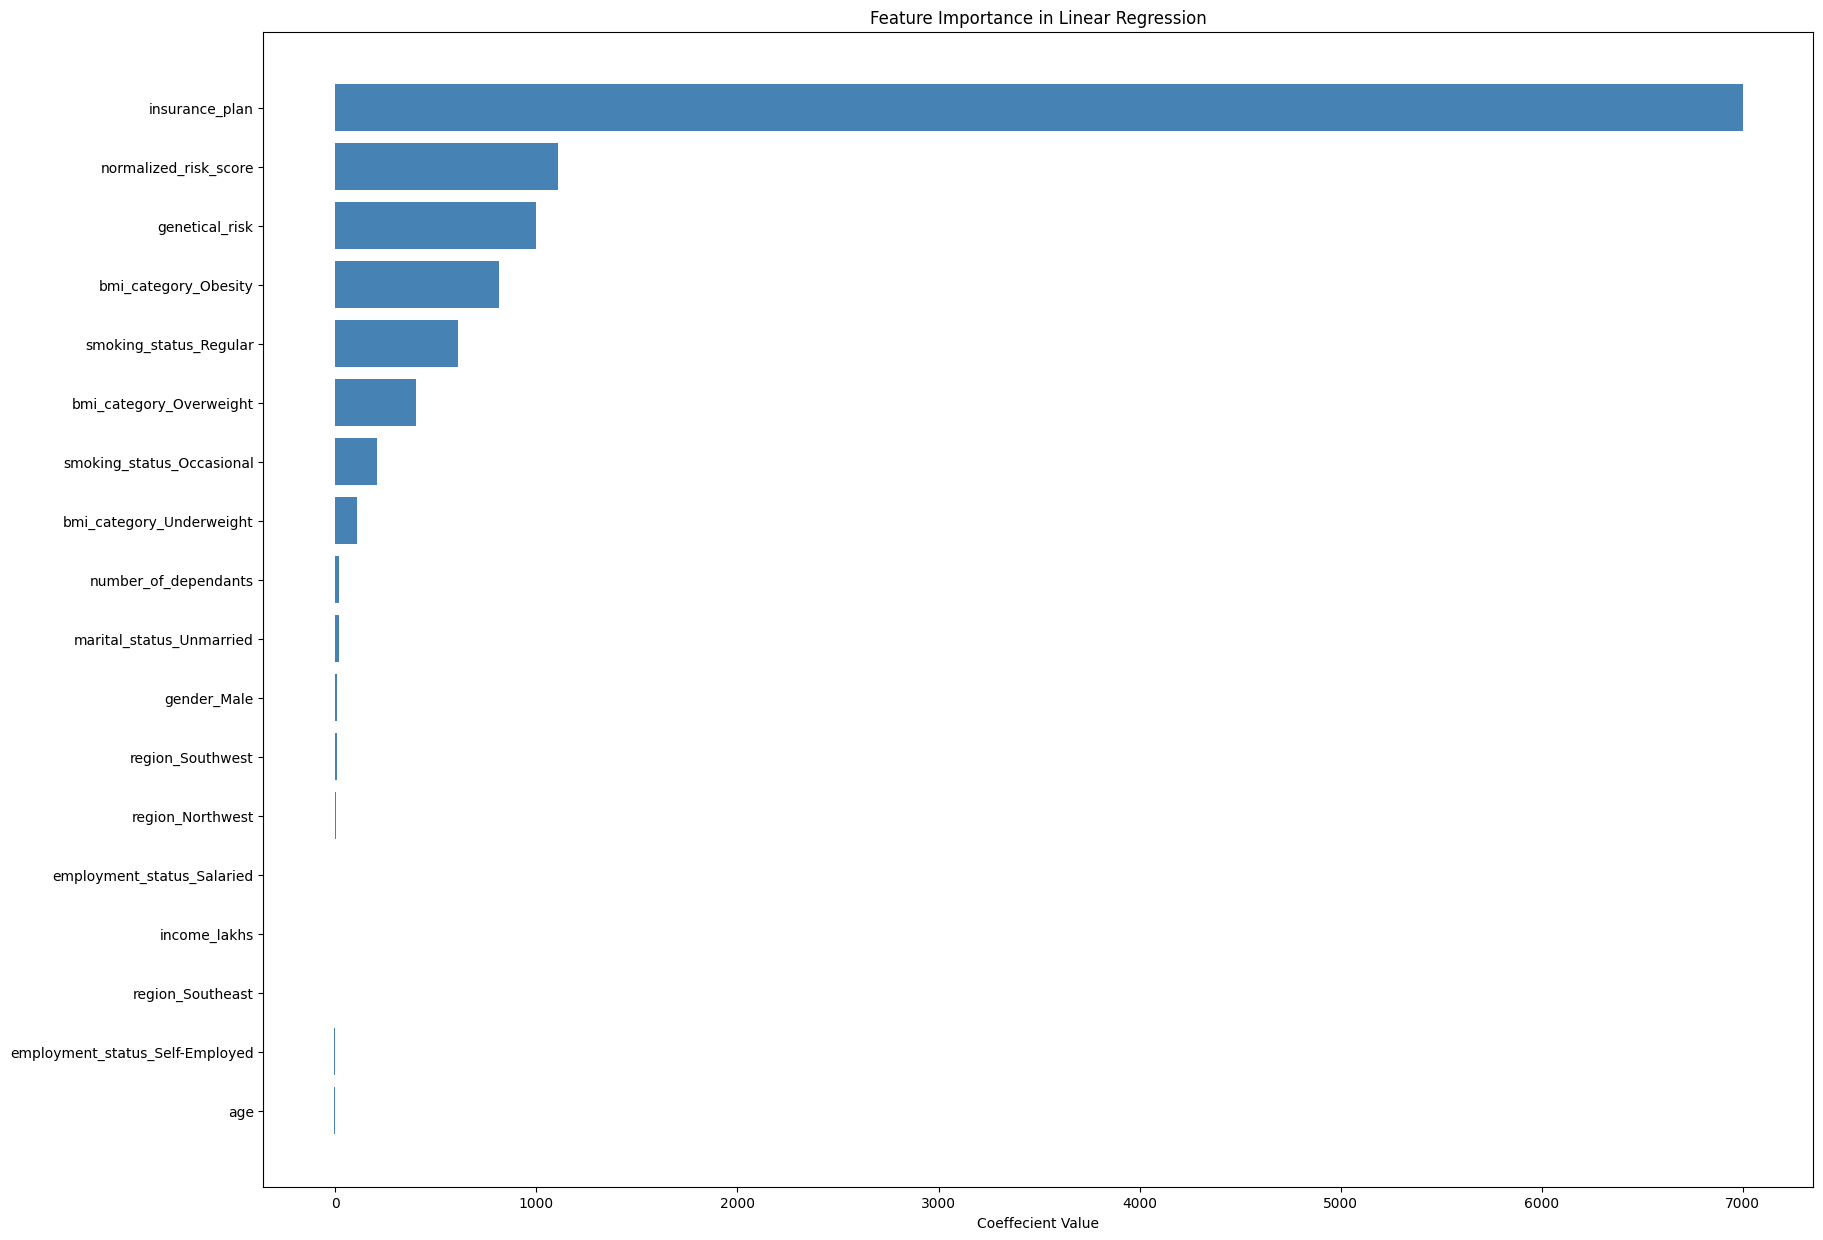

In [77]:
feature_importances = Model.coef_
coef_df = pd.DataFrame(feature_importances,index=X_test.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients',ascending=True)
print(coef_df)
plt.figure(figsize=(20,15))
plt.barh(coef_df.index,coef_df['Coefficients'],color='steelblue')
plt.xlabel('Coeffecient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y,test_size=0.3,random_state=10)

### Ridge Model

In [79]:
Model_ridge = Ridge()
Model_ridge.fit(X_train,y_train)
train_score_ridge = Model_ridge.score(X_train,y_train)
test_score_ridge = Model_ridge.score(X_test,y_test)

In [80]:
train_score_ridge,test_score_ridge

(0.9882974390415337, 0.9887266341700511)

In [81]:
from xgboost import XGBRegressor

Model_boost = XGBRegressor()
Model_boost.fit(X_train,y_train)
train_score_boost = Model_boost.score(X_train,y_train)
test_score_boost = Model_boost.score(X_test,y_test)

In [82]:
train_score_boost,test_score_boost

(0.9925054907798767, 0.987729549407959)

In [83]:
y_pred = Model_boost.predict(X_test)

mse_boost  = mean_squared_error(y_test,y_pred)
rsme_boost = np.sqrt(mse_boost)
print("XGBoost ==> MSED : ",mse_boost, "RSME : ", rsme_boost)

XGBoost ==> MSED :  93312.703125 RSME :  305.47128036036383


In [103]:
best_model = Model

### ERROR ANALYSIS

In [105]:
y_pred = best_model.predict(X_test)
residuals = y_pred-y_test
residuals_pct = residuals*100/y_test
results_df = pd.DataFrame({
  'actual' : y_test,
  'prediction' : y_pred,
  'diff' : residuals,
  'diff_pct' : residuals_pct
})
print(results_df.head())

       actual   prediction        diff  diff_pct
12774    6238  6121.456891 -116.543109 -1.868277
14758    9462  9601.797510  139.797510  1.477463
13205    5152  5611.056493  459.056493  8.910258
14278    6988  7423.486322  435.486322  6.231916
19351    4917  5112.056543  195.056543  3.966983


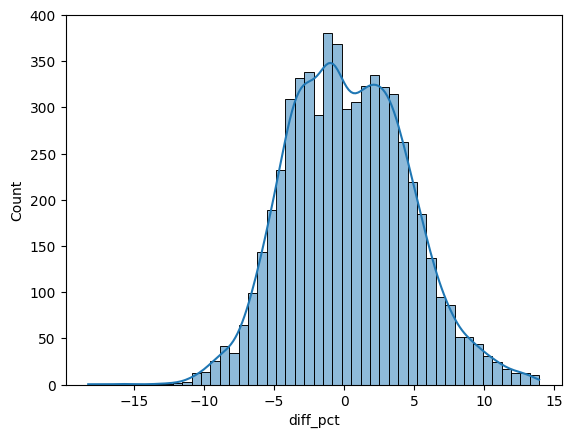

In [106]:
sns.histplot(results_df['diff_pct'],kde=True)
plt.show()

In [108]:
extreme_error_threshold = 10
extreme_results_df = results_df[np.abs(results_df.diff_pct)>extreme_error_threshold]
extreme_results_df.shape

(129, 4)

In [109]:
results_df.shape

(6026, 4)

In [110]:
extreme_error_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

2.140723531364089

In [111]:
extreme_results_df[abs(extreme_results_df.diff_pct)>50].sort_values("diff_pct",ascending=False)

,actual,prediction,diff,diff_pct


In [112]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df.head(2)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
12669,0.857143,0.0,0.000000,0.0,0,0.0,1,0,1,0,1,0,1,0,0,0,1,0
2918,0.285714,0.0,0.151515,0.0,1,0.0,1,1,0,0,1,0,0,0,0,0,1,0


### Export The Model

In [ ]:
from joblib import dump

dump(best_model, "C:/Users/agamb/Desktop/premium preidction/artifacts/model_young.joblib")



['C:/Users/agamb/Desktop/premium preidction/artifacts/model_young.joblib']

In [120]:
scaler_with_cols = {
  'scaler' : scaler,
  'cols_to_scale' : cols_to_scale
}
dump(scaler_with_cols, "C:/Users/agamb/Desktop/premium preidction/artifacts/scaler_young.joblib")

['C:/Users/agamb/Desktop/premium preidction/artifacts/scaler_young.joblib']